# Introduction to sklearn.
## In this exercise set you will familiarize yourself with the methods and datasets in sklearn before getting into more serious stuff.
Start with breast cancer data. Really look through data, not just jump straight to exercise.
Ideas:
- Train several times to get different accuracies -> set random seed.
- Hotmapping to see what features to focus on.

In [ ]:
# Import packages
import numpy as np
import sklearn.datasets
import sklearn.linear_model

# Reproducible results
np.random.seed(42)
data = sklearn.datasets.load_breast_cancer()

In [ ]:
# Split data into training, validation, testing
n_training = int(data.data.shape[0] * 0.75 + 0.5) # 75% of data will be used for training
n_val = int(data.data.shape[0] * 0.15 + 0.5)
n_test = int(data.data.shape[0] * 0.10 + 0.5)
print(f"Number of samples in dataset: {data.data.shape[0]}")
print(f"Split samples for training ({n_training}), validating ({n_val}), and testing ({n_test})")

In [ ]:
# Splitting of data.
X = data.data[:n_training, :]
y = data.target[:n_training]
X_val = data.data[n_training:n_training + n_val, :]
y_val = data.target[n_training:n_training + n_val]

# Note! Do not touch the test data until the very end!
X_test = data.data[n_training + n_val:, :]
y_test = data.target[n_training + n_val:]

print(f"Training set size X  : {X.shape}")
print(f"Training set size y  : {y.shape}")
print(f"Validation set size X: {X_val.shape}")
print(f"Validation set size y: {y_val.shape}")
print(f"Test set size X      : {X_test.shape}")
print(f"Test set size y      : {y_test.shape}")
print(f"Output classes       : {set(y)}")
print(f"Feature names        : {data.feature_names}")

So what's the input? What's the output? What's their range?

In [ ]:
# Task1: Preprocess the data
#  - Try without preprovessing, try with different kinds.
#  - Evaluate on the validation data
standard_scaler = sklearn.preprocessing.StandardScaler()
standard_scaler.fit(X)
X_ = standard_scaler.transform(X)
X_val_ = standard_scaler.transform(X_val)
X_test_ = standard_scaler.transform(X_test)

In [ ]:
# Fit baseline model
model_baseline = sklearn.linear_model.LogisticRegression(
    penalty="none",
    tol=0.001,
    fit_intercept=True,
    solver="lbfgs",
    max_iter=10000,
    multi_class="multinomial")
_ = model_baseline.fit(X_, y)

In [6]:
# Evaluate baseline model
yhat = model_baseline.predict(X_)
yhat_val = model_baseline.predict(X_val_)
acc = sklearn.metrics.accuracy_score(y, yhat)
acc_val = sklearn.metrics.accuracy_score(y_val, yhat_val)
print(f"Training data accuracy  : {acc}")
print(f"Validation data accuracy: {acc_val:.2f}")

Training data accuracy  : 1.0
Validation data accuracy: 0.95


First, let's try to improve the above method somehow. Change training, testing, validation size. Change maximum number of iterations, if you get a reasonable method, move on to:
### Machine learning!

In [14]:
import tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [19]:
num_features = np.shape(X_)[1]

inp = Input(shape=(num_features))
x = Dense(30)(inp)
x = Dense(10)(x)
x = Dense(8)(x)
x = Dense(8)(x)
x = Dense(4)(x)
x = Dense(4)(x)
outp = Dense(1, activation='sigmoid')(x)
model = Model(inp, outp)
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.00001),
              metrics=['accuracy'])
# model.summary()

In [20]:
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=1000, restore_best_weights=True)
loss = model.fit(X_, (y), epochs=1000000, validation_data=(X_val_, (y_val)), callbacks=[es], verbose=0)
test_loss = model.evaluate(X_test_, (y_test), verbose=0)
epoch = np.argmin(loss.history['val_loss'])

print(f"Training data loss  : {loss.history['accuracy'][epoch]}")
print(f"Validation data loss: {loss.history['val_accuracy'][epoch]}")
print(f"Test data loss      : {test_loss[1]}")

Training data loss  : 0.9836065769195557
Validation data loss: 0.9882352948188782
Test data loss      : 0.9473684430122375


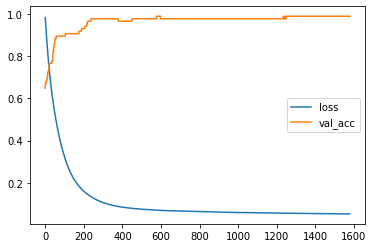

In [21]:
plt.plot(loss.history['loss'])
plt.plot(loss.history['val_accuracy'])
plt.legend(['loss', 'val_acc'])

## Previous dataset works fine, let's try other.
# Diabetes

In [ ]:
# Reproducible results
np.random.seed(42)
data = sklearn.datasets.load_diabetes()

In [ ]:
# Split data into training, validation, testing
n_training = int(data.data.shape[0] * 0.75 + 0.5) # 75% of data will be used for training
n_val = int(data.data.shape[0] * 0.15 + 0.5)
n_test = int(data.data.shape[0] * 0.10 + 0.5)
print(f"Number of samples in dataset: {data.data.shape[0]}")
print(f"Split samples for training ({n_training}), validating ({n_val}), and testing ({n_test})")

In [ ]:
X = data.data[:n_training, :]
y = data.target[:n_training]
X_val = data.data[n_training:n_training + n_val, :]
y_val = data.target[n_training:n_training + n_val]
# Note! Do not touch the test data until the very end!
X_test = data.data[n_training + n_val:, :]
y_test = data.target[n_training + n_val:]

print(f"Training set size X  : {X.shape}")
print(f"Training set size y  : {y.shape}")
print(f"Validation set size X: {X_val.shape}")
print(f"Validation set size y: {y_val.shape}")
print(f"Test set size X      : {X_test.shape}")
print(f"Test set size y      : {y_test.shape}")
print(f"Output classes       : {set(y)}")
print(f"Feature names        : {data.feature_names}")

In [ ]:
# Task1: Preprocess the data
#  - Try without preprovessing, try with different kinds.
#  - Evaluate on the validation data
standard_scaler = sklearn.preprocessing.StandardScaler()
standard_scaler.fit(X)
X_ = standard_scaler.transform(X)
X_val_ = standard_scaler.transform(X_val)
X_test_ = standard_scaler.transform(X_test)

In [ ]:
# Fit baseline model
model = sklearn.linear_model.LinearRegression()
_ = model.fit(X_, y)

In [ ]:
# Evaluate the final model on the test data.
# This is only ever done once, and as the last thing we do.
# Training another model after this, based on the performance on the test data
# leads to biased results.
yhat = model.predict(X_)
yhat_val = model.predict(X_val_)
yhat_test = model.predict(X_test_)
acc = sklearn.metrics.mean_absolute_error(y, yhat)
acc_val = sklearn.metrics.mean_absolute_error(y_val, yhat_val)
acc_test = sklearn.metrics.mean_absolute_error(y_test, yhat_test)
print(f"Training data loss  : {acc}")
print(f"Validation data loss: {acc_val}")
print(f"Test data loss      : {acc_test}")

### Other method:

In [ ]:
# Fit baseline model
model = sklearn.linear_model.Ridge()
_ = model.fit(X_, y)

In [ ]:
# Evaluate the final model on the test data.
# This is only ever done once, and as the last thing we do.
# Training another model after this, based on the performance on the test data
# leads to biased results.
yhat = model.predict(X_)
yhat_val = model.predict(X_val_)
yhat_test = model.predict(X_test_)
acc = sklearn.metrics.mean_absolute_error(y, yhat)
acc_val = sklearn.metrics.mean_absolute_error(y_val, yhat_val)
acc_test = sklearn.metrics.mean_absolute_error(y_test, yhat_test)
print(f"Training data loss  : {acc}")
print(f"Validation data loss: {acc_val}")
print(f"Test data loss      : {acc_test}")

### Machine learning!!!

In [ ]:
num_features = np.shape(X_)[1]

inp = Input(shape=(num_features))
x = Dense(10)(inp)
x = Dense(10)(x)
x = Dense(8)(x)
x = Dense(8)(x)
x = Dense(4)(x)
x = Dense(4)(x)
outp = Dense(1, activation='relu')(x)
model = Model(inp, outp)
model.compile(loss='mean_absolute_error',
              optimizer=Adam(),
              metrics=['mean_absolute_error'])
# model.summary()

In [ ]:
es = EarlyStopping(monitor='val_mean_absolute_error', mode='min', patience=1000, restore_best_weights=True)
loss = model.fit(X_, (y), epochs=1000000, validation_data=(X_val_, (y_val)), callbacks=[es], verbose=0)
test_loss = model.evaluate(X_test_, (y_test), verbose=0)
epoch = np.argmin(loss.history['val_mean_absolute_error'])

print(f"Training data loss  : {loss.history['mean_absolute_error'][epoch]}")
print(f"Validation data loss: {loss.history['val_mean_absolute_error'][epoch]}")
print(f"Test data loss      : {test_loss[1]}")

In [ ]:
plt.plot(loss.history['loss'])
plt.plot(loss.history['val_mean_absolute_error'])
plt.legend(['loss', 'val_loss'])